<a href="https://colab.research.google.com/github/Greeshma06/Spam-n-Ham-Detection/blob/master/Spam_n_Ham_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Assignment : Email Classification


## Introduction:
        
This is a project of email classification and for this purpose here Enron spam dataset is used which contains almost 4-5k of emails containing both 'ham'(not spam) and 'spam' emails. The idea is, given an email you’ve never seen before, determine whether or not that email is Spam or not (aka Ham). In this Enron dataset, each email has already been labeled as Spam or Ham. Since we are making use of these labels in the training phase, this is a supervised learning task. This is called supervised learning because we are supervising the program as it learns what Spam emails look like and what Ham email look like.


## Import the Libraries :

In [ ]:
import re
import pickle
import tarfile
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from string import punctuation
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.snowball import SnowballStemmer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# enron1.tar.gz contains all the emails
enron_files = 'enron1.tar.gz'

## Methodology :

### Preparing the text data:

1. **extract_emails(fname)** : This functions reads the tarfile and stores into a list. List has two columns 'Message' and 'Class'. Message contains extracted emails and Class has the category like 'ham' or 'spam'. The list is then converted into a dataframe and then returned. The argument passed here is the folder name. 

2. **populate_df()** : This function populates all the emails into a Dataframe. This function also drops rows having NA values and duplicate rows.This function returns a dataframe.

3. **clean_email(email)** : This function removes all punctuation, urls, numbers, and newlines. Also converts it into lower case. Arguments passed here is the messages i.e. emails and returns same cleaned email.

4. **preproces_email(email)** :  This function splits the text string into individual words, stem each word, and append the stemmed word to words. Make sure there's a single space between each stemmed word. Arguments passed here is the messages i.e. emails and returns the text of the email.

5. **stopword_removal(email)** : This functions removes the stopwords left in the email text passed as argument and returns text without stop words

In [ ]:
def extract_emails(fname):
    """ Extract the zipped emails and load them into a pandas df """

    rows = []
    # tarfiles are used to read and write tar archives
    originalfile = tarfile.open(fname, 'r:gz')
    for member in originalfile.getmembers():
        if 'ham' in member.name:
            f = originalfile.extractfile(member)
            if f is not None:
                row = f.read()
                rows.append({'message': row, 'class': 'ham'}) 
        if 'spam' in member.name:
            f = originalfile.extractfile(member)
            if f is not None:
                row = f.read()
                rows.append({'message': row, 'class': 'spam'})
    originalfile.close()

    return pd.DataFrame(rows)

In [ ]:
def populate_df():
    """ Populate the dataframe with all the emails """

    emails_df = pd.DataFrame({'message': [], 'class': []})

    unzipped_file = extract_emails(enron_files)
    emails_df = emails_df.append(unzipped_file)
    print("The dimensions of Dataframe created after extracting the tarfile:",emails_df.shape)
    
    # Dropping all the rows with NA values
    emails_df.dropna()
    # Dropping all the duplicates but keeping the first instance
    emails_df.drop_duplicates(keep='first',inplace=True)
    print("The dimensions of Dataframe after droping rows containing NA values and duplicates: ",emails_df.shape)
    
    return(emails_df)

In [ ]:
def clean_email(email):
    
    # Remove mentions
    email = re.sub(r'@\w+', '', email)
    # Remove urls
    email = re.sub(r'http\S+', ' ', email)
    # Remove digits
    email = re.sub("\d+", " ", email)
    email = email.replace('\n', ' ')
    # Remove punctuations
    email = email.translate(str.maketrans("", "", punctuation))
    email = email.lower()
    
    return email

In [ ]:
def preproces_email(email):

    words = ""
    # Create the stemmer.
    stemmer = SnowballStemmer("english")
    # Split text into words.
    email = email.split()
    for word in email:
        # Optional: remove unknown words.
        words = words + stemmer.stem(word) + " "
    
    return words

In [ ]:
def stopword_removal(email):

    stop_words = set(stopwords.words('english')) 

    email = email.split()
    filtered_sentence = ""

    for w in email: 
        if w not in stop_words: 
            filtered_sentence = filtered_sentence + w +" "

    return filtered_sentence

### Main Function :

This function calls the above defined functions for cleaning the data and displays every functions output. Final text displayed is a clean text which will be further used for modelling.

In [ ]:
if __name__ == '__main__':
    emails_df = populate_df()
    print("Downloaded and unziped the files")
    print("==================================================================================================================")
    # Translate bytes objects into strings.
    emails_df['message'] = emails_df['message'].apply(lambda x: x.decode('latin-1'))

    # Reset pandas df index.
    emails_df = emails_df.reset_index(drop=True)

    # Map 'spam' to 1 and 'ham' to 0
    emails_df['class'] = emails_df['class'].map({'spam': 1, 'ham': 0})

    print("After mapping spam and ham emails to 1 and 0 respectively : \n",emails_df.iloc[2500].values)
    print("==================================================================================================================")
    
    emails_df['message'] = emails_df['message'].apply(clean_email)

    print("After cleaning email : \n",emails_df.iloc[2500].values)
    print("==================================================================================================================")
    
    emails_df['message'] = emails_df['message'].apply(preproces_email)
    
    print("After preprocessing the texts : \n",emails_df.iloc[2500].values)
    print("==================================================================================================================")
    
    emails_df['message'] = emails_df['message'].apply(stopword_removal)
    
    print("Removing the stopwords : \n",emails_df.iloc[2500].values)


The dimensions of Dataframe created after extracting the tarfile: (5172, 2)
The dimensions of Dataframe after droping rows containing NA values and duplicates:  (4994, 2)
Downloaded and unziped the files
After mapping spam and ham emails to 1 and 0 respectively : 
 ['Subject: txu fuel co . nom . s for 2 / 20 / 01\r\n( see attached file : hplno 220 . xls )\r\n- hplno 220 . xls'
 0]
After cleaning email : 
 ['subject txu fuel co  nom  s for        \r  see attached file  hplno    xls \r  hplno    xls'
 0]
After preprocessing the texts : 
 ['subject txu fuel co nom s for see attach file hplno xls hplno xls ' 0]
Removing the stopwords : 
 ['subject txu fuel co nom see attach file hplno xls hplno xls ' 0]


In [ ]:
# Define the independent variables as Xs.
Xs = emails_df['message'].values

# Define the target (dependent) variable as Ys.
Ys = emails_df['class'].values


### Splitting the data :

Splitting the dataset into train and test data. The split is 70%-30% respectively.
The splitting function is imported from the library 'sklearn'. this function has many parameter like features, target, test_size (this defines percentage of testset), shuffle (this defines if the data should be shuffled before splitting), random_state (this defines the seed used by random number generator) and stratify (data is split in stratified fashion).

In [ ]:
# Create a train/test split using 30% test size.
X_train, X_test, y_train, y_test = train_test_split(Xs,
                                                    Ys,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=123,
                                                    stratify=Ys)

# Check the split printing the shape of each set.
print("Number of rows in training set is ",X_train.shape)
print("Number of rows in test set is ",X_test.shape)
# .shape() functions defines the dimension of a dataframe
print("==================================================================================================================")

a = np.count_nonzero(y_train)
print("The number of spam data present in train set is : ",a)
print("The number of non-spam data present in train set is : ",y_train.size-a)
print("==================================================================================================================")

b = np.count_nonzero(y_test)
print("The number of spam data present in train set is : ",b)
print("The number of non-spam data present in train set is : ",y_test.size-b)
    

Number of rows in training set is  (3495,)
Number of rows in test set is  (1499,)
The number of spam data present in train set is :  1024
The number of non-spam data present in train set is :  2471
The number of spam data present in train set is :  439
The number of non-spam data present in train set is :  1060


In [ ]:
# For performing exploratory data analysis we combine the feature and target back using pandas
emails_train = list(zip(X_train,y_train))
df_train = pd.DataFrame(emails_train, columns = ['Message', 'Class']) 


### Feature Extraction Process :

Text data requires special preparation before you can start using it for predictive modeling. The text must be parsed to remove words, called tokenization. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).

A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW. This model first tokenizes the document into words and then assign these word a unique number. the fit() function in order to learn a vocabulary from one or more documents.

Here, to convert into Bag of Words we use Count vectorizer. This provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words.

In [ ]:
# Count Vectorizer/ Bag of Words

# Creating  an instance of the CountVectorizer class
cv = CountVectorizer(stop_words='english')
# The fit() function is to learn a vocabulary from one or more documents.
bag_of_words_train = cv.fit_transform(X_train)
# the transform() function is used to encode each document as a vector.
bag_of_words_test = cv.transform(X_test)

print("The shape of Training dataset after converting it into Bag of Words:",bag_of_words_train.shape)

print("The shape of Test dataset after converting it into Bag of Words:",bag_of_words_test.shape)


The shape of Training dataset after converting it into Bag of Words: (3495, 32526)
The shape of Test dataset after converting it into Bag of Words: (1499, 32526)


### Exploratory Data Analysis :

The training dataset combined back is used now for doing exploratory data analysis. Splitting this dataset into two different dataframes based on the target column i.e. into spam and ham. 

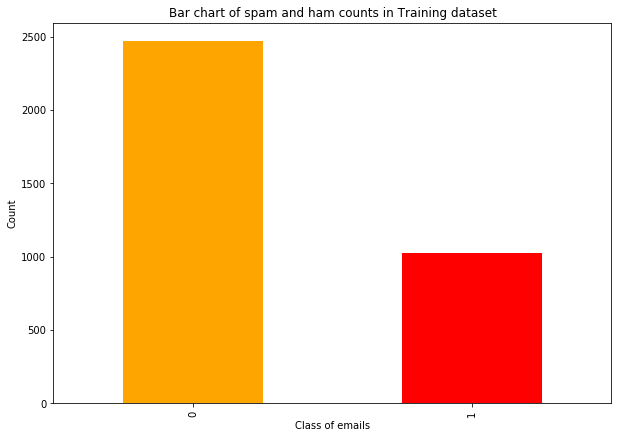

The dimension of ham email dataframe :  (2471, 2)
The dimension of spam email dataframe :  (1024, 2)


In [ ]:
# Plotting the amount of spam and ham email count in training dataset

ax, fig = plt.subplots(figsize=(10, 7))
training_class = df_train["Class"].value_counts()
training_class.plot(kind= 'bar', color= ["orange", "red"])
plt.xlabel("Class of emails")
plt.ylabel("Count")
plt.title('Bar chart of spam and ham counts in Training dataset')
plt.show()

# Grouping based on class/target of training dataset
grouped = df_train.groupby(df_train.Class)
# Creating a dataframe of only ham emails
df_ham = grouped.get_group(0)

print("The dimension of ham email dataframe : ",df_ham.shape) 
print("==================================================================================================================")

df_spam = grouped.get_group(1)
print("The dimension of spam email dataframe : ",df_spam.shape) 

* The training set contains 2471 ham emails and 1024 spam emails
* Ham is denoted as 0 and spam is denoted as 1

To calculate frequency of each word, first both the dataframes are converted into Bag of words using 'Countvectorizer'. Then the following feature names and count of words are then zipped, converted into an array and then into a dictionary. Finally converting into dataframe using pandas.
Thus words and frequency of each dataset is made.

In [ ]:

# Making a word and frequency dictionary for ham dataset
bow_ham = cv.fit_transform(df_ham.Message)
word_freq_ham = dict(zip(cv.get_feature_names(), np.asarray(bow_ham.sum(axis=0)).ravel()))
word_counter_ham = collections.Counter(word_freq_ham)
#  Counter is an unordered collection where elements are stored as Dict keys and their count as dict value.
counter_df_ham = pd.DataFrame(word_counter_ham.most_common(20), columns = ['word', 'freq'])
print("Ham Dataframe having columns of words and their frequencies : \n",counter_df_ham.head(10))
print("==================================================================================================================")

# Making a word and frequency dictionary for spam dataset
bow_spam = cv.fit_transform(df_spam.Message)
word_freq_spam = dict(zip(cv.get_feature_names(), np.asarray(bow_spam.sum(axis=0)).ravel()))
word_counter_spam = collections.Counter(word_freq_spam)
counter_df_spam = pd.DataFrame(word_counter_spam.most_common(20), columns = ['word', 'freq'])
print("Spam Dataframe having columns of words and their frequencies : \n",counter_df_spam.head(10))
    

Ham Dataframe having columns of words and their frequencies : 
       word  freq
0      ect  9493
1      hou  4980
2    enron  4555
3  subject  4332
4     deal  2496
5      com  2212
6      gas  1891
7    meter  1886
8    pleas  1863
9       pm  1605
Spam Dataframe having columns of words and their frequencies : 
       word  freq
0  subject  1140
1      com   693
2     http   666
3  compani   646
4    price   508
5      www   403
6   inform   396
7      ani   391
8    pleas   368
9   invest   345


* Top 10 words are shown above from both the dataframes

Below shown are the Barplots of top 20 words: 

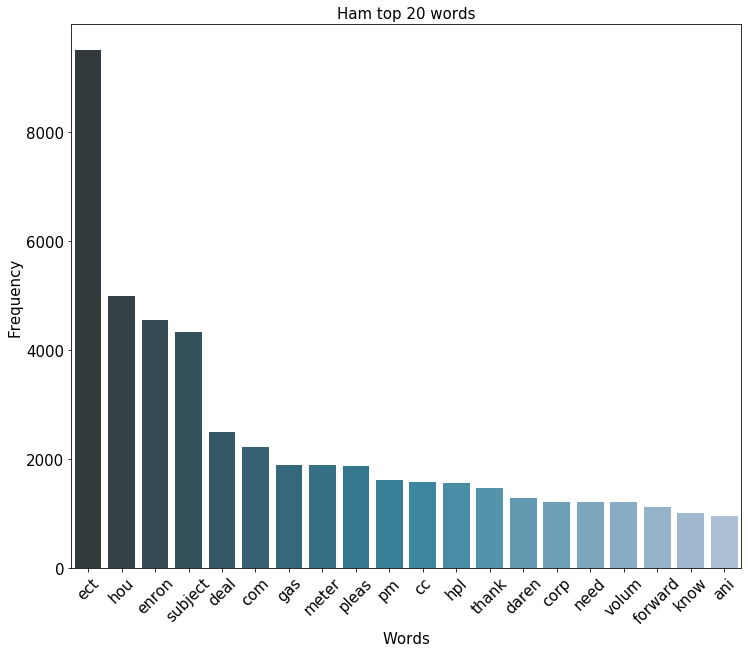

In [ ]:
# Plotting top 20 HAM words
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=counter_df_ham, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Words',fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title('Ham top 20 words', fontsize = 15)
plt.show();

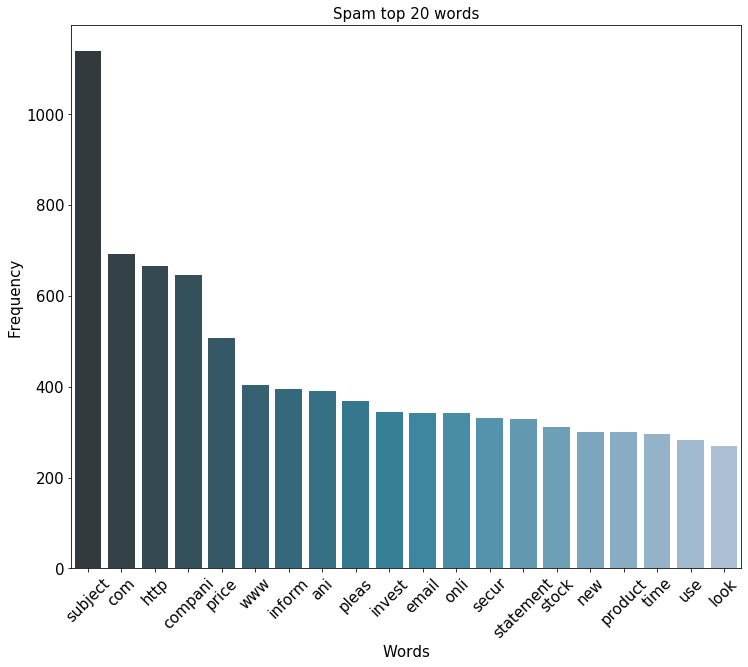

In [ ]:
# Plotting top 20 SPAM words
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=counter_df_spam, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Words',fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title('Spam top 20 words', fontsize = 15)
plt.show();

**Most common words in spam :**

Many words in spam dataset, as expected are related to investment and communication ("company", "price", "invest", "online", "http", "www"). This is because most spam texts want the receivers to reach back to them. 

**Most common words in ham :**

Many words in ham-common-words list are "deal", "gas", "meter", "enron", "forward". This can be considered as reasonable in a conversation between people.

In [ ]:
# Info of training dataset grouped by class
grouped.describe()

Message                                                               
        count unique                                                top freq
Class                                                                       
0        2471   2248  subject hpl nom june see attach file hplo xls ...   18
1        1024   1018                                           subject     3

This analysis tells us that there are 2471 ham texts and 1024 spam texts. Most of the texts are unique. Messages of both ham and spam are shown in the table and the frequencies are given.

Counting the number of words in each mail in both datasets using lambda and split function. 

In [ ]:
# Calculating number of words for each cleaned emails
df_spam['num_of_words'] = df_spam['Message'].apply(lambda x: len(x.split(' ')))
print("The spam dataset after adding new column \n", df_spam.head(10))
print("==================================================================================================================")
df_ham['num_of_words'] = df_ham['Message'].apply(lambda x: len(x.split(' ')))
print("The ham dataset after adding new column \n",df_ham.head(10))

The spam dataset after adding new column 
                                               Message  Class  num_of_words
0   subject friend password amaz adult site userna...      1            20
5   subject entourag stockmogul newslett ralph vel...      1           717
6   subject hm elblo dear home owner hajv e bee n ...      1            90
17  subject dell pentium ghz system dell system fe...      1           227
19  subject chemisorb correa new softwar windowxp ...      1            20
20  subject ambien sleep med c u n generic http ww...      1            21
21  subject fw window xp offic xp dol lar hey guy ...      1           385
24  subject weekend entertain alpha male plus onli...      1            40
25  subject cialli softab onlli ayfi ci iali softa...      1            57
28  subject best softwar price generat wardrob sac...      1            46
The ham dataset after adding new column 
                                               Message  Class  num_of_words
1   subject new

F:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print ("Skew of Spam",skew(df_spam['num_of_words']))
print ("Skew of Ham",skew(df_ham['num_of_words']))

Skew of Spam 2.7516494249297816
Skew of Ham 7.905275697672241


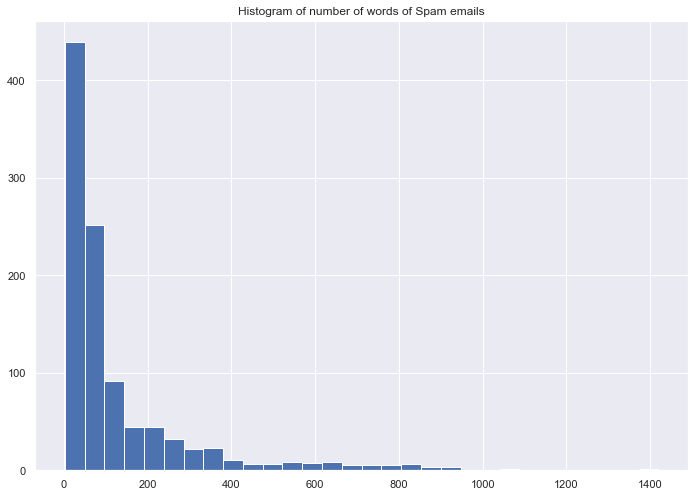

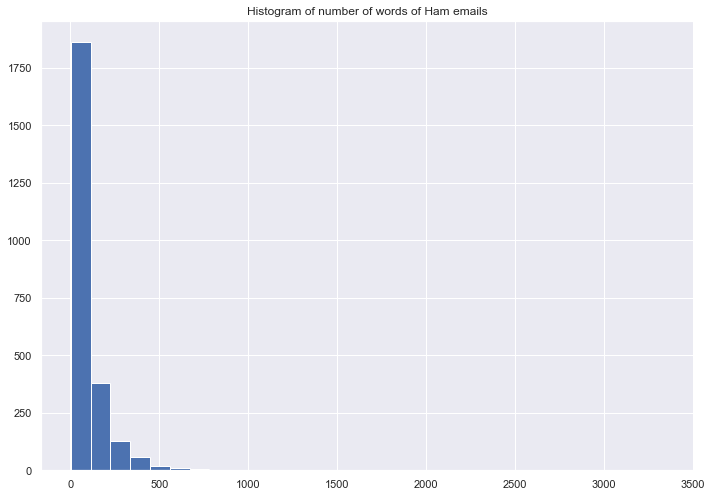

Skew of Spam 2.7516494249297816
Skew of Ham 7.905275697672241


In [ ]:
# df_spam['num_of_words'].plot.hist()
from scipy.stats import skew

plt.hist(df_spam['num_of_words'],bins = 30)
plt.title('Histogram of number of words of Spam emails')
plt.show()
plt.hist(df_ham['num_of_words'],bins = 30)
plt.title('Histogram of number of words of Ham emails')
plt.show()


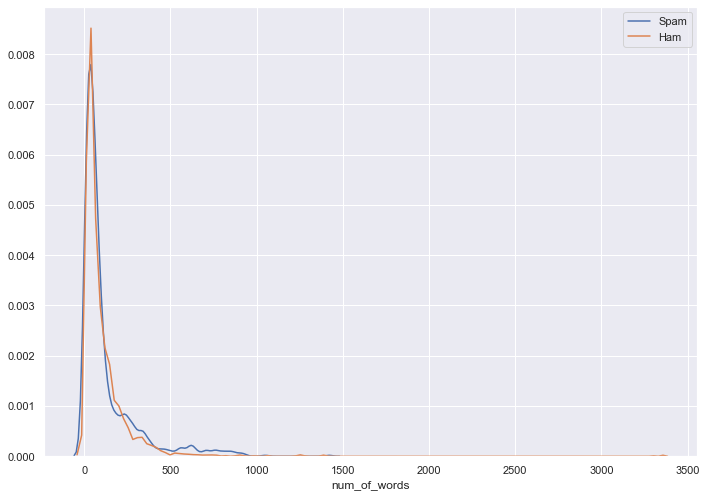

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_spam.num_of_words, hist=False, label="Spam")
sns.distplot(df_ham.num_of_words, hist=False, label="Ham");

* Skewness measures the lack of symmetry in data distribution.
* Both these data are highly skewed (positively).
* It can be noted that spam emails are in general that of same length as of ham emails but a few are longer in terms of number of words calculated.

**Below shown is Wordcloud representation of Ham and Spam words in total:** 

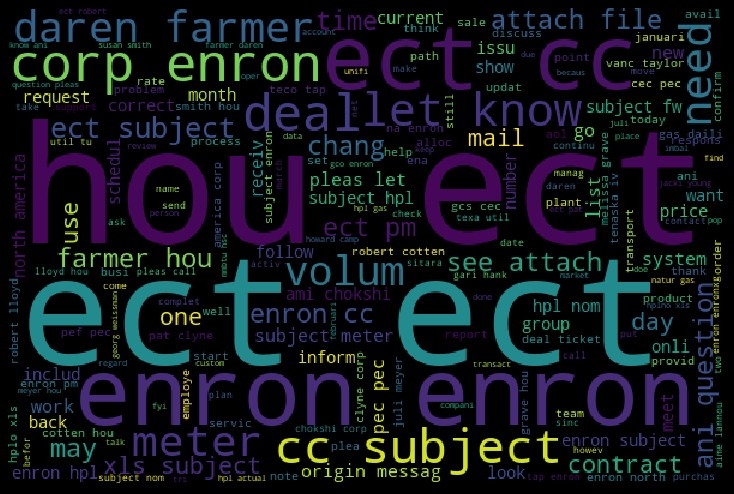

In [ ]:
ham_words = ''

for w in df_ham.Message:
    text = w.lower()
    tokens = word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '
# Generate a word cloud image
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

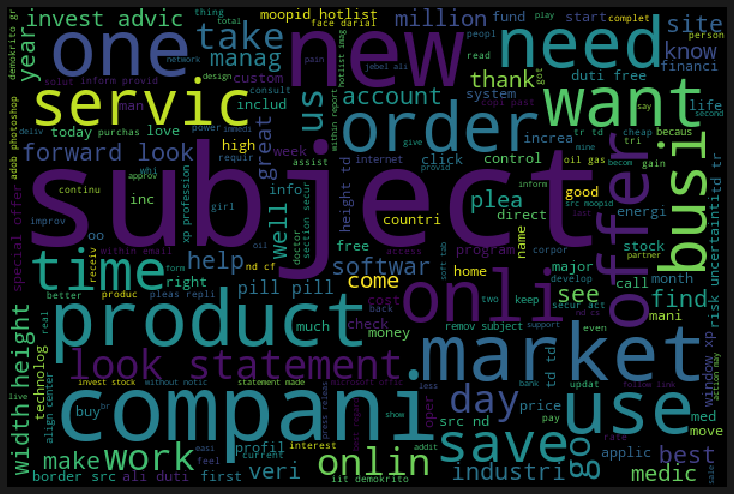

In [ ]:
spam_words = ''

for w in df_spam.Message:
    text = w.lower()
    tokens = word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df_train['num_of_words'] = df_train['Message'].apply(lambda x: len(x.split(' ')))

print(df_train.groupby('Class').describe())
print("==================================================================================================================")
print("Mean of total training dataset length",df_train["num_of_words"].mean())

      num_of_words                                                         
             count        mean         std  min   25%   50%     75%     max
Class                                                                      
0           2471.0   92.175637  139.790242  3.0  21.0  46.0  112.00  3339.0
1           1024.0  124.873047  173.262241  2.0  29.0  60.0  132.25  1420.0
Mean of total training dataset length 101.75565092989986


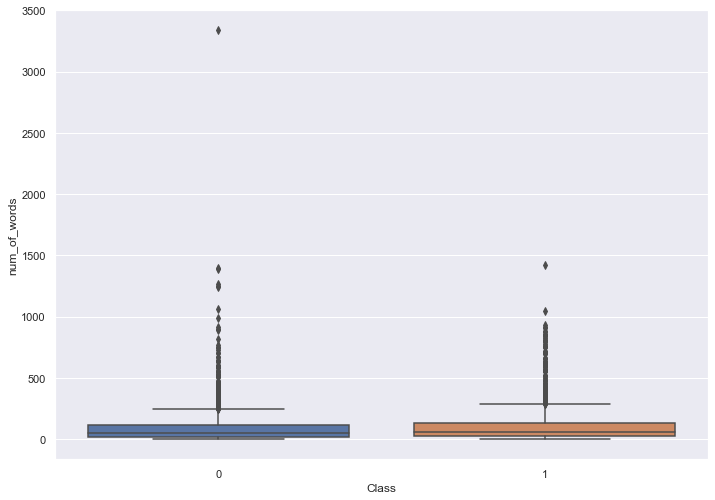

In [ ]:
ax = sns.boxplot(x="Class", y="num_of_words", data=df_train)

In [ ]:
print("Ham : \n",df_ham[df_ham['num_of_words']>700])
print("==================================================================================================================")
print("Spam : \n",df_spam[df_spam['num_of_words']>700])

## Printing all the texts which are longer in both spam and ham dataset

Ham : 
                                                 Message  Class  num_of_words
460   subject memo present brian redmond fyi tell in...      0          1265
487   subject energi oper gas oper organiz chang fyi...      0           745
602   subject fw red white blue origin messag carter...      0          3339
611   subject coastal oil gas corpor daren fyi bob f...      0          1244
612   subject bpa rate case season rate forward mari...      0           890
1135  subject manag director vice presid elect manag...      0           756
1339  subject global account promot pleas join globa...      0           772
1485  subject support month charg analyst rc report ...      0           726
1545  subject hpl optim pleas make sure staff receiv...      0          1386
1646  subject coastal oil gas corpor melissa deal ti...      0           898
2525  subject sitara releas chang global due consent...      0          1063
2672  subject sitara releas chang global due consent...      0      

### Training the Classifiers :

#### Support Vector Machines:

Support Vector Machines is considered to be a classification approach. SVM constructs a hyperplane in multidimensional space to separate different classes. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

Import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function. Then, fit the model on train set using fit() and perform prediction on the test set using predict().

* Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
* Recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. 

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC(kernel='rbf') 
# Radial Basis Function Kernel
# RBF are useful for non-linear hyperplane.

#Train the model using the training sets
model_svm = svm.fit(bag_of_words_train, y_train)

#Predict the response for test dataset
y_pred = model_svm.predict(bag_of_words_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

SVM_confusion_matrix = confusion_matrix(y_test, y_pred)
print("The Confusion matrix after applying SVM  is : \n",SVM_confusion_matrix)
print("==================================================================================================================")

## Cross Validation
scores_svm = cross_val_score(svm, bag_of_words_train, y_train, scoring= 'accuracy',cv=10)
print("Scores of 10 cross validation performed :",scores_svm)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores_svm.mean(), scores_svm.std() * 2))

print("==================================================================================================================")

predicted = cross_val_predict(svm, bag_of_words_train, y_train, cv=10)

Cross_valid_matrix = confusion_matrix(y_train, predicted)
print("The Confusion matrix after applying SVM cross validation is : \n",Cross_valid_matrix)


Accuracy: 0.9746497665110073
Precision: 0.9387308533916849
Recall: 0.9772209567198178
The Confusion matrix after applying SVM  is : 
 [[1032   28]
 [  10  429]]
Scores of 10 cross validation performed : [0.96       0.96       0.97428571 0.97142857 0.97142857 0.94269341
 0.97707736 0.98280802 0.95988539 0.95415473]
Accuracy: 0.965 (+/- 0.023)
The Confusion matrix after applying SVM cross validation is : 
 [[2388   83]
 [  38  986]]


* After fitting SVM on test dataset and predicting this on test set, the confusion matrix shows that 1450 were correctly classified and 49 mails were incorrectly classified.
* And obtained an accuracy of 97.46% with a precision of 93.87% and a sensitivity (i.e. recall) of 97.72%
* After applying cross validation on training dataset, according to the confusion matrix we can say that 3355 were correctly classified and 140 were misclassified from the training dataset.
* Obtained an accuracy of 96.5% in cross validation

Adding all the accuracy scores of 10 cross validations into a dictionary: 

In [ ]:
Accuracy_dict = {}
Accuracy_dict.update({'SVM':scores_svm})
print(Accuracy_dict)

{'SVM': array([0.96      , 0.96      , 0.97428571, 0.97142857, 0.97142857,
       0.94269341, 0.97707736, 0.98280802, 0.95988539, 0.95415473])}


### Model Selection:

Applying various other classification model to perform text classification.
1. Multinomial Naive Bayes
2. Logistic Regression 
3. Random Forest
4. K Nearest Neighbors

In [ ]:
# Create classifier.
nb = MultinomialNB(alpha=0.05)

# Cross Validation using Multinomial NB
scores_nb = cross_val_score(nb, bag_of_words_train, y_train, scoring= 'accuracy',cv=10)
print("Scores of 10 cross validation performed : \n",scores_nb)
print("==================================================================================================================")
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores_nb.mean(), scores_nb.std() * 2))
print("==================================================================================================================")

predicted = cross_val_predict(nb, bag_of_words_train, y_train, cv=15)
# print the confusion matrix
print("The Confusion matrix after applying MultinomialNB cross validation is : \n",metrics.confusion_matrix(y_train, predicted))


Scores of 10 cross validation performed : 
 [0.98       0.96857143 0.96285714 0.98       0.97714286 0.97421203
 0.97421203 0.99140401 0.98567335 0.97421203]
Accuracy: 0.977 (+/- 0.015)
The Confusion matrix after applying MultinomialNB cross validation is : 
 [[2416   55]
 [  28  996]]


In [ ]:
Accuracy_dict.update({'NB':scores_nb})
print(Accuracy_dict)

{'SVM': array([0.96      , 0.96      , 0.97428571, 0.97142857, 0.97142857,
       0.94269341, 0.97707736, 0.98280802, 0.95988539, 0.95415473]), 'NB': array([0.98      , 0.96857143, 0.96285714, 0.98      , 0.97714286,
       0.97421203, 0.97421203, 0.99140401, 0.98567335, 0.97421203])}


In [ ]:
# 1. import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 2. instantiate a logistic regression model
logreg = LogisticRegression()

# Cross Validation using Logistic Regression
scores_logreg = cross_val_score(logreg, bag_of_words_train, y_train, scoring= 'accuracy',cv=10)
print("Scores of 10 cross validation performed : \n",scores_logreg)
print("==================================================================================================================")
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores_logreg.mean(), scores_logreg.std() * 2))
print("==================================================================================================================")

predicted = cross_val_predict(logreg, bag_of_words_train, y_train, cv=15)

# print the confusion matrix
print("The Confusion matrix after applying Logistic Regression cross validation is : \n",metrics.confusion_matrix(y_train, predicted))


Scores of 10 cross validation performed : 
 [0.98       0.95714286 0.97714286 0.97142857 0.98285714 0.96275072
 0.97994269 0.98853868 0.98853868 0.96848138]
Accuracy: 0.976 (+/- 0.020)
The Confusion matrix after applying Logistic Regression cross validation is : 
 [[2410   61]
 [  29  995]]


In [ ]:
Accuracy_dict.update({'Logistic':scores_logreg})
print(Accuracy_dict)

{'SVM': array([0.96      , 0.96      , 0.97428571, 0.97142857, 0.97142857,
       0.94269341, 0.97707736, 0.98280802, 0.95988539, 0.95415473]), 'NB': array([0.98      , 0.96857143, 0.96285714, 0.98      , 0.97714286,
       0.97421203, 0.97421203, 0.99140401, 0.98567335, 0.97421203]), 'Logistic': array([0.98      , 0.95714286, 0.97714286, 0.97142857, 0.98285714,
       0.96275072, 0.97994269, 0.98853868, 0.98853868, 0.96848138])}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
random=RandomForestClassifier(n_estimators=100)

# Cross Validation using Random Forest
scores_random = cross_val_score(random, bag_of_words_train, y_train, scoring= 'accuracy',cv=10)
print("Scores of 10 cross validation performed : \n",scores_random)
print("==================================================================================================================")
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_random.mean(), scores_random.std() * 2))
print("==================================================================================================================")

predicted = cross_val_predict(random, bag_of_words_train, y_train, cv=10)

# print the confusion matrix
print("The Confusion matrix after applying Random Forest cross validation is : \n",metrics.confusion_matrix(y_train, predicted))


Scores of 10 cross validation performed : 
 [0.97428571 0.95142857 0.97428571 0.98       0.98571429 0.95415473
 0.98280802 0.97994269 0.9713467  0.9512894 ]
Accuracy: 0.97 (+/- 0.03)
The Confusion matrix after applying Random Forest cross validation is : 
 [[2415   56]
 [  32  992]]


In [ ]:
Accuracy_dict.update({'Random Forest':scores_random})
print(Accuracy_dict)

{'SVM': array([0.96      , 0.96      , 0.97428571, 0.97142857, 0.97142857,
       0.94269341, 0.97707736, 0.98280802, 0.95988539, 0.95415473]), 'NB': array([0.98      , 0.96857143, 0.96285714, 0.98      , 0.97714286,
       0.97421203, 0.97421203, 0.99140401, 0.98567335, 0.97421203]), 'Logistic': array([0.98      , 0.95714286, 0.97714286, 0.97142857, 0.98285714,
       0.96275072, 0.97994269, 0.98853868, 0.98853868, 0.96848138]), 'Random Forest': array([0.97428571, 0.95142857, 0.97428571, 0.98      , 0.98571429,
       0.95415473, 0.98280802, 0.97994269, 0.9713467 , 0.9512894 ])}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Use cross_val_score function
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores_knn = cross_val_score(knn, bag_of_words_train, y_train, cv=10, scoring='accuracy')
print("Scores of 10 cross validation performed",scores_knn)
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

predicted = cross_val_predict(knn, bag_of_words_train, y_train, cv=10)

# print the confusion matrix
print("The Confusion matrix after applying KNN cross validation is : \n",metrics.confusion_matrix(y_train, predicted))


Scores of 10 cross validation performed [0.87428571 0.85714286 0.89142857 0.84571429 0.88571429 0.86819484
 0.86246418 0.86532951 0.89684814 0.85673352]
Accuracy: 0.87 (+/- 0.03)
The Confusion matrix after applying KNN cross validation is : 
 [[2068  403]
 [  50  974]]


In [ ]:
Accuracy_dict.update({'KNN':scores_knn})
print(Accuracy_dict)

{'SVM': array([0.96      , 0.96      , 0.97428571, 0.97142857, 0.97142857,
       0.94269341, 0.97707736, 0.98280802, 0.95988539, 0.95415473]), 'NB': array([0.98      , 0.96857143, 0.96285714, 0.98      , 0.97714286,
       0.97421203, 0.97421203, 0.99140401, 0.98567335, 0.97421203]), 'Logistic': array([0.98      , 0.95714286, 0.97714286, 0.97142857, 0.98285714,
       0.96275072, 0.97994269, 0.98853868, 0.98853868, 0.96848138]), 'Random Forest': array([0.97428571, 0.95142857, 0.97428571, 0.98      , 0.98571429,
       0.95415473, 0.98280802, 0.97994269, 0.9713467 , 0.9512894 ]), 'KNN': array([0.87428571, 0.85714286, 0.89142857, 0.84571429, 0.88571429,
       0.86819484, 0.86246418, 0.86532951, 0.89684814, 0.85673352])}


In [ ]:
Accuracy_df = pd.DataFrame.from_dict(Accuracy_dict,orient='columns')
print(Accuracy_df)

        SVM        NB  Logistic  Random Forest       KNN
0  0.960000  0.980000  0.980000       0.974286  0.874286
1  0.960000  0.968571  0.957143       0.951429  0.857143
2  0.974286  0.962857  0.977143       0.974286  0.891429
3  0.971429  0.980000  0.971429       0.980000  0.845714
4  0.971429  0.977143  0.982857       0.985714  0.885714
5  0.942693  0.974212  0.962751       0.954155  0.868195
6  0.977077  0.974212  0.979943       0.982808  0.862464
7  0.982808  0.991404  0.988539       0.979943  0.865330
8  0.959885  0.985673  0.988539       0.971347  0.896848
9  0.954155  0.974212  0.968481       0.951289  0.856734


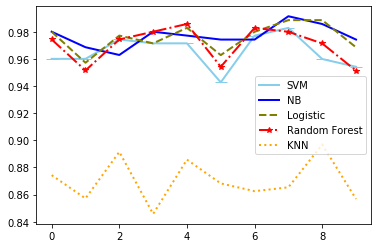

In [ ]:
# multiple line plot
plt.plot('SVM', data=Accuracy_df, marker='_', markersize=12, color='skyblue', linewidth=2)
plt.plot('NB', data=Accuracy_df, marker='', color='blue', linewidth=2)
plt.plot('Logistic', data=Accuracy_df, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.plot('Random Forest', data=Accuracy_df, marker='*', color='red', linewidth=2, linestyle='dashdot')
plt.plot('KNN', data=Accuracy_df, marker='', color='orange', linewidth=2, linestyle='dotted')
plt.legend()

plt.show()

* Thus, we have performed Cross Validation on all remaining 5 classifiers.

From the above plot we can infer that :
* KNN showed the least accuracy 
* Multinomial Naive Bayes has scored highest accuracy of 97.7%
* Thus for the further evaluation we may use Multinomial Naive Bayes Classifier

### Model Evaluation :

Proceeding further with Multinomial Naive Bayes Classifier.

**Word Frequencies with TfidfVectorizer**: 
One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.
An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word. TF-IDF are word frequency scores that try to highlight words that are more interesting. The same create, fit, and transform process is used as with the CountVectorizer.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
pipe = Pipeline([  
  ('vectorize', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('classify', MultinomialNB())
  ])

from sklearn.model_selection import GridSearchCV
parameters = {'vectorize__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'classify__alpha':(1e-2, 1e-3)
        
 }

gs_clf = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

predict_MNB = gs_clf.predict(X_test)

metrics.confusion_matrix(y_test, predict_MNB)

print("Accuracy: ",gs_clf.best_score_)
print("======================================================================================================================")
for param_name in sorted(parameters.keys()):
     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Accuracy:  0.9874105865522175
classify__alpha: 0.001
tfidf__use_idf: True
vectorize__ngram_range: (1, 2)


Displayed above is the Accuarcy of Naive Bayes Classifier after converting the texts into bag of words and then calculating its frequency and then finally applying the model to it.

Accuracy is 98.74% .
Also displayed is best parameters which helped in bringing out this precision to the model.

*Now calculating the out-of-sample error:*

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit..

R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

Lower values of RMSE indicate better fit.

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predict_MNB))
'''returns out-of-sample error for already fit model.'''
print(rmse)


0.10003335000926467


Since the RMSE is as low as 0.1, we can say that this indicate a better fit.

In [ ]:
print(metrics.confusion_matrix(y_test,predict_MNB))

[[1053    7]
 [   8  431]]


* After final Prediction with an accuracy of 98.74% and RMSE of 0.1 shown above is the Confusion matrix of testing dataset
* We here have 1484 Correctly classified text data and 15 misclassified text data

In [ ]:
# print message text for the false positives (ham incorrectly classified as spam)
print(X_test[predict_MNB > y_test])
print("======================================================================================================================")

# print message text for the false negatives (spam incorrectly classified as ham)
print(X_test[predict_MNB < y_test])
print("======================================================================================================================")


['subject digit memori compaq scanner tire search photo import file quit look solut \x0f offer compaq test approv agfa tm snapscan touch usb scanner sharper photo reproduct epson tm perfect u usb scanner avail pictur photo hard drive scan readi e mail friend famili store cd librari also abl unclutt offic allow store document easili place origin scanner bed click onli scanner simplifi life great valu come easi use softwar usb compat readi go moment box stop search everyth need click away order agfa snapscan go http greatidea compaq com cgi bin flo ecp bdtnxori crxv order epson perfect go http greatidea compaq com cgi bin flo ecp bdtnxori cryw would rather receiv e mail futur contest promot servic updat product enhanc cool activ new product pleas e mail remov name mail list attl htm '
 'subject laci hey thought let know laci went school morn pale feel well stomach still hurt went ahead stress big time act like hard move came back hous talk fine telephon ask question feel dead know look p

In [ ]:
# calculate AUC
metrics.roc_auc_score(y_test, predict_MNB)


0.9875864958954743

* AUC is useful as a single number summary of classifier performance
* Higher value = better classifier

## REFERENCES :

1.	J. Brownlee, “How to Prepare Text Data for Machine Learning with scikit-learn,” Machine Learning Mastery, Sep. 28, 2017. https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/ (accessed Apr. 04, 2020).
2.	“Evaluating a Classification Model,” ritchieng.github.io. http://www.ritchieng.com/machine-learning-evaluate-classification-model/ (accessed Apr. 05, 2020).
3.	“Tutorials — Matplotlib 3.2.1 documentation.” https://matplotlib.org/3.2.1/tutorials/index.html (accessed Apr. 05, 2020).
4.	“spam_classifier.” https://www.cs.bgu.ac.il/~elhadad/nlp16/spam_classifier.html (accessed Apr. 05, 2020).
5.	“spam vs ham text filter.” https://kaggle.com/larui529/spam-vs-ham-text-filter (accessed Apr. 05, 2020).



